In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
gender_submission_data = pd.read_csv("./DatasetsTitanic/gender_submission.csv")
train_data = pd.read_csv("./DatasetsTitanic/train.csv")
test_data = pd.read_csv("./DatasetsTitanic/test.csv")

In [3]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [4]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [5]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./DatasetsTitanic/submission.csv', index=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

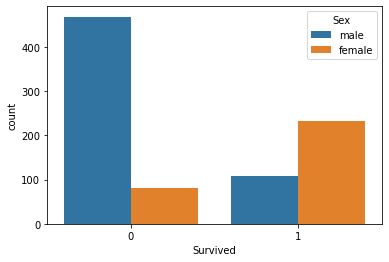

In [6]:
sns.countplot(x='Survived', hue='Sex', data=train_data)

In [7]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
X.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [9]:
output['compare'] = output['Survived'] == gender_submission_data['Survived']
output.head()

,PassengerId,Survived,compare
0,892,0,True
1,893,1,True
2,894,0,True
3,895,0,True
4,896,1,True


In [10]:
right_predictions = output[output['compare'] == True].count()
all_predictions = output['compare'].count()
print(right_predictions['compare'] / all_predictions)

1.0
